In [100]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.insert(1, './fma_metadata/')
from fma_metadata import utils
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (13, 5)

----
# Years of Rock
### How rock changed from 2008 to 2015
------

### 1. Loading data - preprocessing

In [101]:
# loading datasets
echonest = utils.load('/Users/gaetanoantonicchio/Desktop/dataset_DM2/fma_metadata/echonest.csv')
tracks = utils.load('/Users/gaetanoantonicchio/Desktop/dataset_DM2/fma_metadata/tracks.csv')

In [102]:
rock_genre = tracks['track'][['genre_top']][tracks['track']['genre_top'] == 'Hip-Hop']
# filtered echonest_audio_features by rock genres
rock_df = echonest['echonest','audio_features'].merge(rock_genre,on='track_id')

In [103]:
rock_df.shape

(910, 9)

In [104]:
# extract year from date_created --> to new col: year_created in track
tracks['track','year'] = pd.DatetimeIndex(tracks['track','date_created']).year
years = tracks['track'][['year']]
duration = tracks['track'][['duration']]
listens = tracks['track'][['listens']]
rock_df = rock_df.merge(years, on='track_id')
rock_df = rock_df.merge(listens, on='track_id')
rock_df = rock_df.merge(duration, on='track_id')
rock_df.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top,year,listens,duration
track_id,,,,,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop,2008,1293,168
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop,2008,514,237
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,Hip-Hop,2008,1151,206
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Hip-Hop,2008,943,207
583,0.748986,0.765886,0.513173,0.957209,0.614844,0.886914,180.025,0.401672,Hip-Hop,2008,536,134


In [105]:
rock_df.year.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])

In [106]:
# normalized audio features
rock_df.iloc[:,0:8] = (rock_df.iloc[:,0:8]\
                                           -rock_df.iloc[:,0:8].min())\
                                          /(rock_df.iloc[:,0:8].max()\
                                            -rock_df.iloc[:,0:8].min())
rock_df.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top,year,listens,duration
track_id,,,,,,,,,,,,
2,0.419914,0.656440,0.637513,0.010816,0.160171,0.144310,0.673791,0.572962,Hip-Hop,2008,1293,168
3,0.377317,0.479539,0.823609,0.001884,0.081897,0.465123,0.458476,0.250039,Hip-Hop,2008,514,237
5,0.043898,0.740141,0.705646,0.000709,0.373393,0.107495,0.310952,0.620231,Hip-Hop,2008,1151,206
134,0.455733,0.461032,0.562188,0.019786,0.071740,0.532678,0.388480,0.906379,Hip-Hop,2008,943,207
583,0.754814,0.764553,0.514148,0.974125,0.637009,0.915940,0.751723,0.389149,Hip-Hop,2008,536,134


### 2. Data Visualization
#### Song features by year

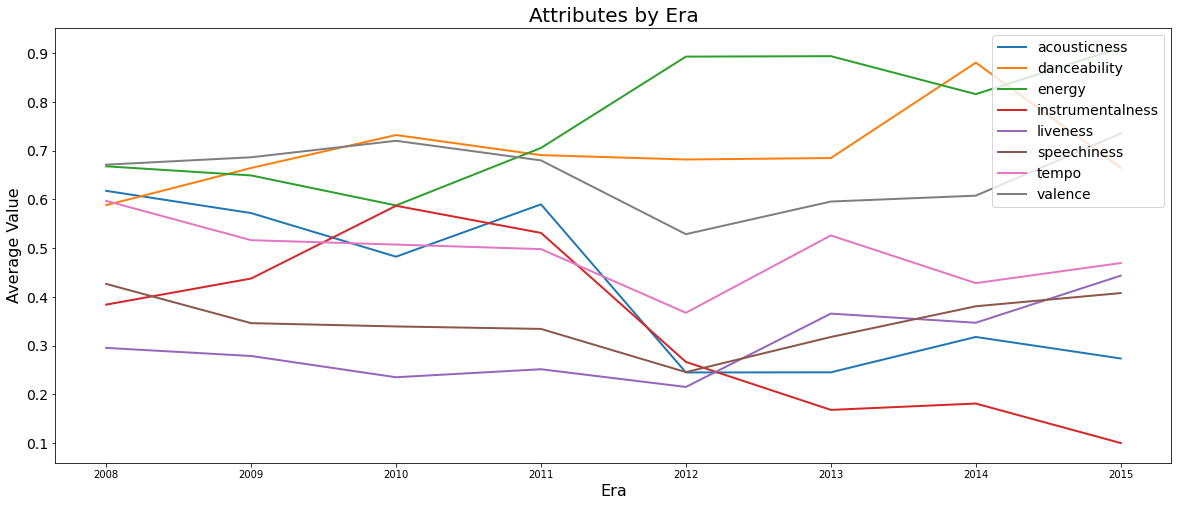

In [107]:
plt.figure(figsize=(20, 8))
attributes = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'speechiness', 'tempo', 'valence']
for attribute in attributes:
    x = rock_df.groupby("year")[attribute].mean()
    ax= sns.lineplot(x=x.index,y=x,label=attribute,linewidth = 2, seed=4)

ax.set_title('Attributes by Era', fontsize=20);
ax.set_ylabel('Average Value', fontsize=16);
ax.set_xlabel('Era', fontsize=16);
ax.legend(prop=dict(size=14));
#ax.set_xticklabels(fontsize=14, labels=['50s/60s', '70s/80s', '90s/2000s']);
ax.set_yticklabels(fontsize=14, labels=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]);

#### Number of songs per year

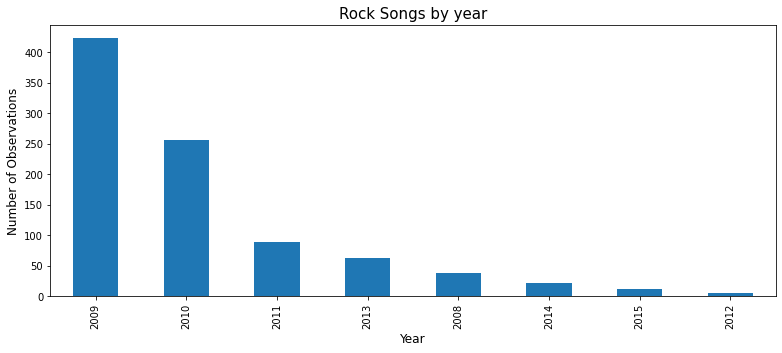

In [108]:
chart =rock_df['year'].value_counts().plot(kind='bar');
chart.set_title('Rock Songs by year', fontsize=15);
chart.set_ylabel('Number of Observations', fontsize=12);
chart.set_xlabel('Year', fontsize=12);

#### How Duration changed from 2008- 2015 for Rock?

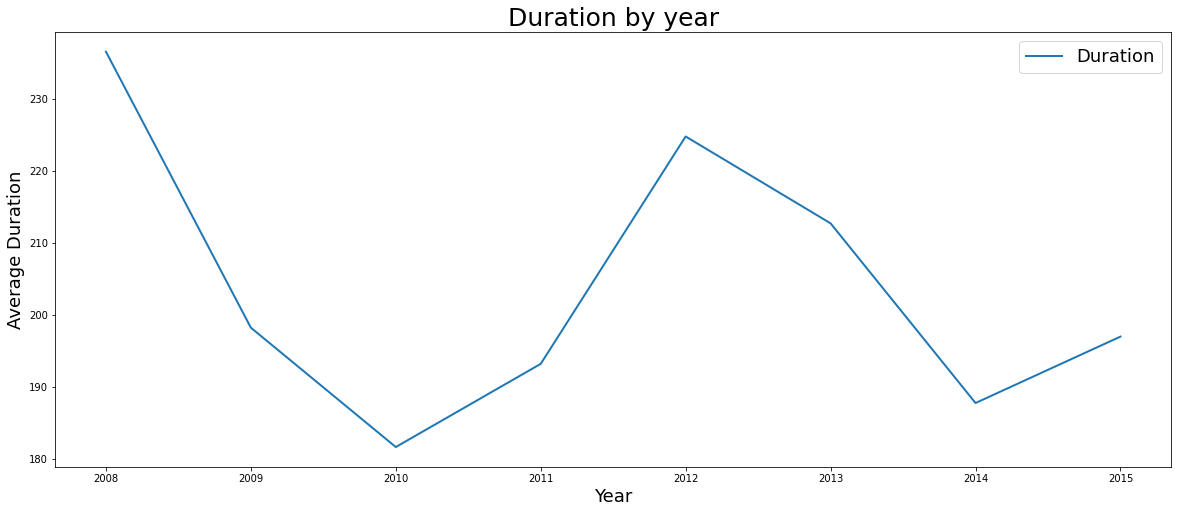

In [109]:
plt.figure(figsize=(20, 8))
x = rock_df.groupby("year")['duration'].mean()
ax= sns.lineplot(x=x.index,y=x,label='Duration',linewidth = 2, seed=4)

ax.set_title('Duration by year', fontsize=25);
ax.set_ylabel('Average Duration', fontsize=18);
ax.set_xlabel('Year', fontsize=18);
ax.legend(prop=dict(size=18));
#ax.set_xticklabels(fontsize=14, labels=['50s/60s', '70s/80s', '90s/2000s']);
#ax.set_yticklabels(fontsize=14, labels=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]);

#### Rock listens by year

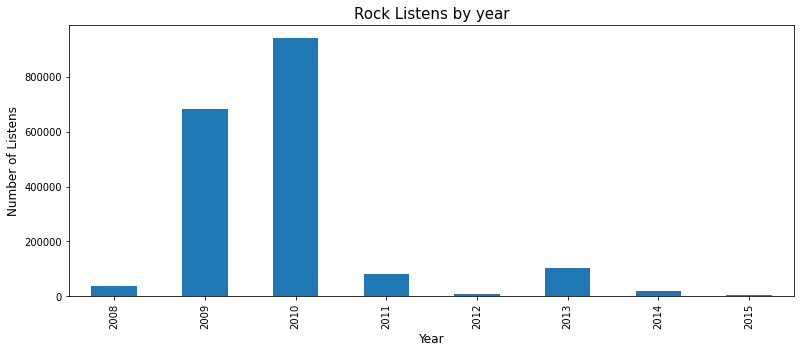

In [110]:
x = rock_df.groupby("year")['listens'].sum()
char_l = x.plot(kind='bar')
char_l.set_title('Rock Listens by year', fontsize=15);
char_l.set_ylabel('Number of Listens', fontsize=12);
char_l.set_xlabel('Year', fontsize=12);

#### Correlation matrix

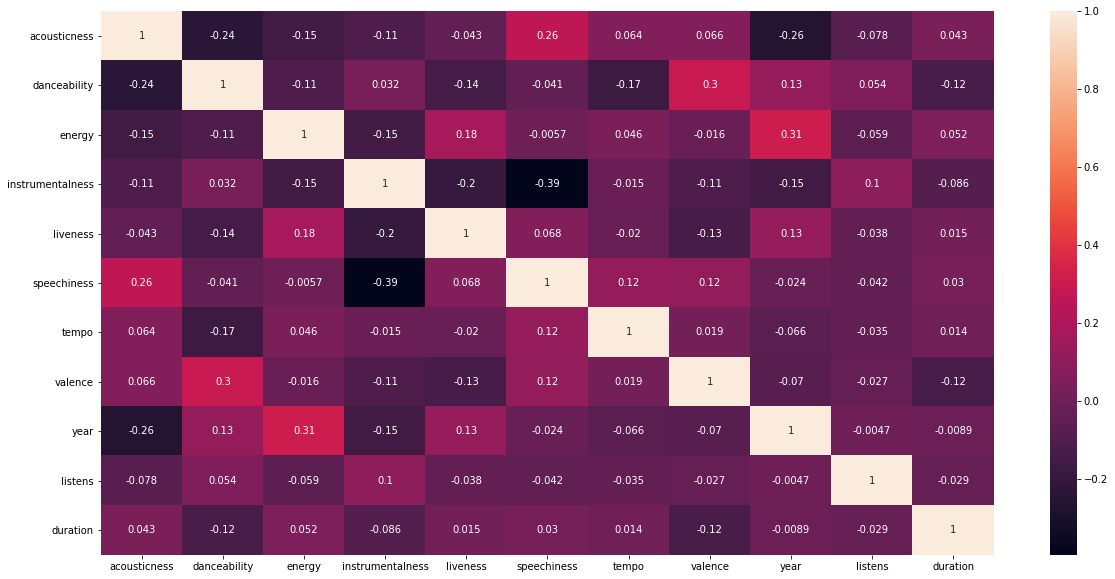

In [111]:
# Inspect correlations between features
plt.figure(figsize=(20, 10))
sns.heatmap(rock_df.corr(),annot=True);

In [112]:
# saving dataset for classification
#with open("rock_year_df.csv","w") as df:
#    df.write(rock_df.to_csv(index=True))